### Download all the necessary libraries we will need for today session

#### 1) We will try out using 
    pip install pipenv
    pipenv install
    pipenv shell
If dependancy is still an issue we will go to Google Colab.
#### 2) Download the libraries we will need for today's session
#### 3) Load in our API credentials

In [ ]:
# We will be running the following code in our terminal/ cell depending on what is chosen.

# Our own local machine:
# %pipenv install langchain langchain_core langchain_openai langchain-community langchain_text_splitters openai pypdf python-dotenv numpy scikit-learn matplotlib scikit-learn scipy beautifulsoup4 pypdf chroma langgraph typing typing_extensions 

# Google Colab:
# %pip install langchain langchain_core langchain_openai langchain-community langchain_text_splitters openai pypdf python-dotenv numpy scikit-learn matplotlib scikit-learn scipy beautifulsoup4 pypdf chroma langgraph typing typing_extensions

In [1]:
# Load the libraries needed
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

In [2]:
load_dotenv("template2.env")

True

In [3]:
# If LangSmith isn't tracking try to restart the entire kernel at the top
trace = os.getenv("LANGCHAIN_TRACING_V2")
langsmith = os.getenv("LANGCHAIN_API_KEY")

In [4]:
# Create a model using GPT-4
gpt = ChatOpenAI(
    model='gpt-4o',
    openai_api_key = os.getenv("OPENAI_API_KEY"),
    temperature=0.7
)

In [5]:
# Let's test it out
results = gpt.invoke("Tell me something about singapore that most singaporeans wouldn't know about.")
print(results.content)

One lesser-known fact about Singapore is its significant role in the global orchid trade. While many Singaporeans are aware of the country's national flower, the Vanda Miss Joaquim orchid, they may not know that Singapore is one of the world's leading centers for orchid breeding and export. The country's orchid industry has a long history, and Singapore's Botanical Gardens have been at the forefront of orchid hybridization for over a century. As a result, Singapore plays a crucial part in the development of new orchid varieties that are distributed worldwide. Additionally, the annual Singapore Garden Festival is a testament to the country's commitment to horticulture and showcases some of the most stunning and innovative orchid displays in the world.


In [6]:
# Normal Embeddings models
from langchain_openai import OpenAIEmbeddings
embeddings1 = OpenAIEmbeddings(
    openai_api_key = os.getenv("OPENAI_API_KEY"),
    model = 'text-embedding-3-large'
)


In [7]:
# Embeddings models
from langchain_openai import OpenAIEmbeddings

embeddings2 = OpenAIEmbeddings(
    model="text-embedding-3-large",
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    dimensions = 1024
)

# Embeddings

In [8]:
text = "Data Analytics Club is dope and fun, in today's session we will be covering topics on GenAI, specifically RAG systems"

# Embed the text above using the embed_query function
single_vector = embeddings1.embed_query(text)

# Represent the semantic meaning of the text, or in other words the vector and position in a given vector space.
print(single_vector)

# Dimensionality
print(len(single_vector))

[-0.04663636162877083, 0.003934943117201328, -0.021584264934062958, 0.009581380523741245, 0.006277971900999546, -0.010874344035983086, -0.03127028048038483, 0.020298775285482407, 0.038983214646577835, 0.03850489482283592, 0.01967097818851471, -0.039581120014190674, 0.04292936995625496, -0.02097141556441784, -0.03387115150690079, 0.001928234240040183, -0.03085174784064293, -0.005377382040023804, -0.004450633656233549, -0.07730873674154282, 0.011083610355854034, -0.016741259023547173, -0.0029596153181046247, 0.04080681875348091, -0.016113461926579475, -0.01442438829690218, -0.018938548862934113, 0.027324125170707703, -0.04239125922322273, 0.016591783612966537, 0.005407277029007673, -0.0034809112548828125, 0.03913269191980362, -0.007929676212370396, -0.04687552526593208, 0.010403496213257313, 0.023990821093320847, 0.04328811168670654, -0.018714334815740585, 0.01257836539298296, 0.014962499961256981, 0.0077204108238220215, -0.02935699187219143, 0.026307692751288414, -0.002705506980419159, 

In [9]:
# Reduced dimensionality, incase your computer cannot handle the computation required
# Improves model performance and reduces overfitting
# For visualisation and human interpretations

single_vector2 = embeddings2.embed_query(text)
print(single_vector2)

print(len(single_vector2))

[-0.0637698695063591, 0.004900054540485144, -0.029589874669909477, 0.013042905367910862, 0.008990691043436527, -0.015235506929457188, -0.0429094173014164, 0.0278890710324049, 0.05331915244460106, 0.05319620296359062, 0.02752022258937359, -0.054343730211257935, 0.05864696949720383, -0.029139060527086258, -0.0468028225004673, 0.003148022573441267, -0.04241761937737465, -0.007602384779602289, -0.006434363313019276, -0.10532683879137039, 0.014723217114806175, -0.02303256280720234, -0.004190532956272364, 0.05561421066522598, -0.022048965096473694, -0.019948575645685196, -0.025594012811779976, 0.03768405690789223, -0.05774533748626709, 0.022786661982536316, 0.007484558038413525, -0.005130585283041, 0.053892917931079865, -0.010799074545502663, -0.06430265307426453, 0.014784691855311394, 0.03229476511478424, 0.05983548238873482, -0.025307130068540573, 0.017489584162831306, 0.02065553516149521, 0.010553175583481789, -0.0402659997344017, 0.035655390471220016, -0.004008669871836901, -0.0094619980

# Embeddings on a larger text/documents

In [10]:
# List of products in a shop

products = [
    {
        'title': 'Smartphone X1',
        'short_description': 'The latest flagship smartphone with AI-powered features and 5G connectivity.',
        'price': 799.99,
        'category': 'Electronics',
        'features': [
            '6.5-inch AMOLED display',
            'Quad-camera system with 48MP main sensor',
            'Face recognition and fingerprint sensor',
            'Fast wireless charging'
        ]
    },
    {
        'title': 'Luxury Diamond Necklace',
        'short_description': 'Elegant necklace featuring genuine diamonds, perfect for special occasions.',
        'price': 1499.99,
        'category': 'Beauty',
        'features': [
            '18k white gold chain',
            '0.5 carat diamond pendant',
            'Adjustable chain length',
            'Gift box included'
        ]
    },
    {
        'title': 'RC Racing Car',
        'short_description': 'High-speed remote-controlled racing car for adrenaline-packed fun.',
        'price': 89.99,
        'category': 'Toys',
        'features': [
            'Top speed of 30 mph',
            'Responsive remote control',
            'Rechargeable battery',
            'Durable construction'
        ]
    },
    {
        'title': 'Ultra HD 4K TV',
        'short_description': 'Immerse yourself in stunning visuals with this 65-inch 4K TV.',
        'price': 1299.99,
        'category': 'Electronics',
        'features': [
            '65-inch 4K UHD display',
            'Dolby Vision and HDR10+ support',
            'Smart TV with streaming apps',
            'Voice remote included'
        ]
    },
    {
        'title': 'Glowing Skin Serum',
        'short_description': 'Revitalize your skin with this nourishing serum for a radiant glow.',
        'price': 39.99,
        'category': 'Beauty',
        'features': [
            'Hyaluronic acid and vitamin C',
            'Hydrates and reduces fine lines',
            'Suitable for all skin types',
            'Cruelty-free'
        ]
    },
    {
        'title': 'LEGO Space Shuttle',
        'short_description': 'Build your own space adventure with this LEGO space shuttle set.',
        'price': 49.99,
        'category': 'Toys',
        'features': [
            '359 pieces for creative building',
            'Astronaut minifigure included',
            'Compatible with other LEGO sets',
            'For ages 7+'
        ]
    },
    {
        'title': 'Wireless Noise-Canceling Headphones',
        'short_description': 'Enjoy immersive audio and block out distractions with these headphones.',
        'price': 199.99,
        'category': 'Electronics',
        'features': [
            'Active noise cancellation',
            'Bluetooth 5.0 connectivity',
            'Long-lasting battery life',
            'Foldable design for portability'
        ]
    },
    {
        'title': 'Luxury Perfume Gift Set',
        'short_description': 'Indulge in a collection of premium fragrances with this gift set.',
        'price': 129.99,
        'category': 'Beauty',
        'features': [
            'Five unique scents',
            'Elegant packaging',
            'Perfect gift for fragrance enthusiasts',
            'Variety of fragrance notes'
        ]
    },
    {
        'title': 'Remote-Controlled Drone',
        'short_description': 'Take to the skies and capture stunning aerial footage with this drone.',
        'price': 299.99,
        'category': 'Electronics',
        'features': [
            '4K camera with gimbal stabilization',
            'GPS-assisted flight',
            'Remote control with smartphone app',
            'Return-to-home function'
        ]
    },
    {
        'title': 'Luxurious Spa Gift Basket',
        'short_description': 'Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.',
        'price': 79.99,
        'category': 'Beauty',
        'features': [
            'Bath bombs, body lotion, and more',
            'Aromatherapy candles',
            'Reusable wicker basket',
            'Great for self-care'
        ]
    },
    {
        'title': 'Robot Building Kit',
        'short_description': 'Learn robotics and coding with this educational robot building kit.',
        'price': 59.99,
        'category': 'Toys',
        'features': [
            'Build and program your own robot',
            'STEM learning tool',
            'Compatible with Scratch and Python',
            'Ideal for young inventors'
        ]
    },
    {
        'title': 'High-Performance Gaming Laptop',
        'short_description': 'Dominate the gaming world with this powerful gaming laptop.',
        'price': 1499.99,
        'category': 'Electronics',
        'features': [
            'Intel Core i7 processor',
            'NVIDIA RTX graphics',
            '144Hz refresh rate display',
            'RGB backlit keyboard'
        ]
    },
    {
        'title': 'Natural Mineral Makeup Set',
        'short_description': 'Enhance your beauty with this mineral makeup set for a flawless look.',
        'price': 34.99,
        'category': 'Beauty',
        'features': [
            'Mineral foundation and eyeshadows',
            'Non-comedogenic and paraben-free',
            'Cruelty-free and vegan',
            'Includes makeup brushes'
        ]
    },
    {
        'title': 'Interactive Robot Pet',
        'short_description': 'Adopt your own robot pet that responds to your voice and touch.',
        'price': 79.99,
        'category': 'Toys',
        'features': [
            'Realistic pet behaviors',
            'Voice recognition and touch sensors',
            'Teaches responsibility and empathy',
            'Rechargeable battery'
        ]
    },
    {
        'title': 'Smart Thermostat',
        'short_description': "Control your home's temperature and save energy with this smart thermostat.",
        'price': 129.99,
        'category': 'Electronics',
        'features': [
            'Wi-Fi connectivity',
            'Energy-saving features',
            'Compatible with voice assistants',
            'Easy installation'
        ]
    },
    {
        'title': 'Designer Makeup Brush Set',
        'short_description': 'Upgrade your makeup routine with this premium designer brush set.',
        'price': 59.99,
        'category': 'Beauty',
        'features': [
            'High-quality synthetic bristles',
            'Chic designer brush handles',
            'Complete set for all makeup needs',
            'Includes stylish carrying case'
        ]
    },
    {
        'title': 'Remote-Controlled Dinosaur Toy',
        'short_description': 'Roar into action with this remote-controlled dinosaur toy with lifelike movements.',
        'price': 49.99,
        'category': 'Toys',
        'features': [
            'Realistic dinosaur sound effects',
            'Walks and roars like a real dinosaur',
            'Remote control included',
            'Educational and entertaining'
        ]
    },
    {
        'title': 'Wireless Charging Dock',
        'short_description': 'Charge your devices conveniently with this sleek wireless charging dock.',
        'price': 39.99,
        'category': 'Electronics',
        'features': [
            'Qi wireless charging technology',
            'Supports multiple devices',
            'LED charging indicators',
            'Compact and stylish design'
        ]
    },
    {
        'title': 'Luxury Skincare Set',
        'short_description': 'Elevate your skincare routine with this luxurious skincare set.',
        'price': 179.99,
        'category': 'Beauty',
        'features': [
            'Premium anti-aging ingredients',
            'Hydrating and rejuvenating formulas',
            'Complete skincare regimen',
            'Elegant packaging'
        ]
    }
]

In [11]:
# Type of keys we have
print(products[0].keys())

# Number of products being sold in our outlet
print(len(products))

dict_keys(['title', 'short_description', 'price', 'category', 'features'])
19


In [12]:
# We want to embed the short descriptions from products
# Extract a list of product short descriptions from products
product_descriptions = [product['short_description']for product in products]

print(product_descriptions)

['The latest flagship smartphone with AI-powered features and 5G connectivity.', 'Elegant necklace featuring genuine diamonds, perfect for special occasions.', 'High-speed remote-controlled racing car for adrenaline-packed fun.', 'Immerse yourself in stunning visuals with this 65-inch 4K TV.', 'Revitalize your skin with this nourishing serum for a radiant glow.', 'Build your own space adventure with this LEGO space shuttle set.', 'Enjoy immersive audio and block out distractions with these headphones.', 'Indulge in a collection of premium fragrances with this gift set.', 'Take to the skies and capture stunning aerial footage with this drone.', 'Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.', 'Learn robotics and coding with this educational robot building kit.', 'Dominate the gaming world with this powerful gaming laptop.', 'Enhance your beauty with this mineral makeup set for a flawless look.', 'Adopt your own robot pet that responds to your voice

In [13]:
# Create embeddings for each product description, nested list
response = embeddings1.embed_documents(product_descriptions)
response2 = embeddings1.embed_documents(product_descriptions)

# We will use embed_documents here 
print(response)
print(len(response))

# The whole thing will be embedded as a whole
print(response2)
print(len(response2))

[[-0.027369659394025803, 0.02990911342203617, -0.01559949666261673, 0.029344789683818817, -0.009983140975236893, 0.002875359496101737, -0.005115855950862169, 0.029989730566740036, 0.0444202721118927, -0.002445399295538664, 0.019375085830688477, -0.009801751002669334, 0.020020026713609695, -0.002924066036939621, -0.028431124985218048, 0.010379510000348091, -0.011273021809756756, -0.01592196710407734, -0.000525693641975522, -0.05240141227841377, -0.0003951099934056401, -0.033725012093782425, -0.011823908425867558, -0.04270043224096298, 0.015156100504100323, 0.0008107942994683981, 0.013604212552309036, 0.025609510019421577, -0.01863609254360199, 0.011723136529326439, 0.03023158386349678, 0.0069129555486142635, 0.01311378926038742, 0.01061464473605156, 0.013496722094714642, 0.021954847499728203, 0.027060626074671745, 0.03592855855822563, 0.02730247937142849, 0.01766868121922016, 0.000733535795006901, -0.005428248550742865, 0.02156519703567028, 0.0033086787443608046, 0.026039469987154007, -

In [14]:
# Extract the embeddings from response_dict and store in products
for i, product in enumerate(products):
    product['embeddings'] = response[i]

print(products[0])
print(products[0].keys())

{'title': 'Smartphone X1', 'short_description': 'The latest flagship smartphone with AI-powered features and 5G connectivity.', 'price': 799.99, 'category': 'Electronics', 'features': ['6.5-inch AMOLED display', 'Quad-camera system with 48MP main sensor', 'Face recognition and fingerprint sensor', 'Fast wireless charging'], 'embeddings': [-0.027369659394025803, 0.02990911342203617, -0.01559949666261673, 0.029344789683818817, -0.009983140975236893, 0.002875359496101737, -0.005115855950862169, 0.029989730566740036, 0.0444202721118927, -0.002445399295538664, 0.019375085830688477, -0.009801751002669334, 0.020020026713609695, -0.002924066036939621, -0.028431124985218048, 0.010379510000348091, -0.011273021809756756, -0.01592196710407734, -0.000525693641975522, -0.05240141227841377, -0.0003951099934056401, -0.033725012093782425, -0.011823908425867558, -0.04270043224096298, 0.015156100504100323, 0.0008107942994683981, 0.013604212552309036, 0.025609510019421577, -0.01863609254360199, 0.01172313

## Dimensionality Reduction

#### 1) Understanding how the vectors work in a way that humans can understand

    a) There are two ways of performing a dimensionality reduction task. Linear and Non-linear reduction methods.
    b) We will be using PCA and TSNE for our visualisation purposes

##### 2) Let's go back to the slides to understand abit more about dimensionality reduction and the techniques to accomplish them

### t-distributed Stochastic Neighbor Embedding (TSNE)

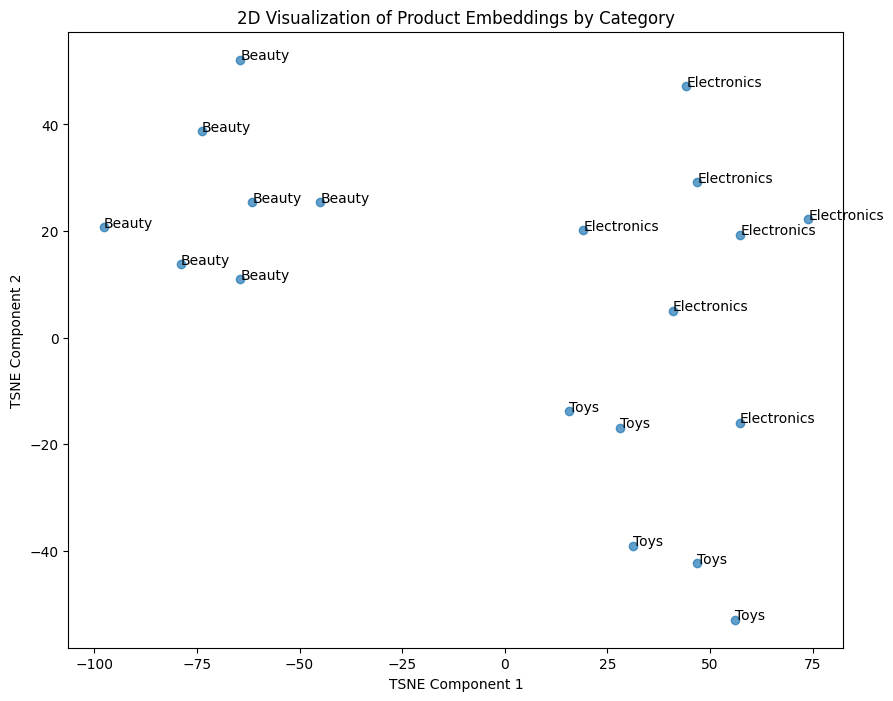

In [15]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create reviews and embeddings lists using list comprehensions
categories = [product['category'] for product in products]
embeddings = [product['embeddings'] for product in products]

# Reduce the number of embeddings dimensions to two using t-SNE
tsne = TSNE(n_components=2, perplexity=5)
embeddings_2d = tsne.fit_transform(np.array(embeddings))

# Create a scatter plot of the 2D embeddings
plt.figure(figsize=(10, 8))

# Create a scatter plot from embeddings_2d
plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], alpha=0.7)

for i, category in enumerate(categories):
    plt.annotate(category, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("2D Visualization of Product Embeddings by Category")
plt.show()

### Principal Component Analysis (PCA)

In [ ]:
# Extract categories and embeddings from products
categories = [product['category'] for product in products]
embeddings = [product['embeddings'] for product in products]  # Assuming 'embedding' contains vector data

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

# Create a scatter plot of the 2D embeddings
plt.figure(figsize=(10, 8))

# Numpy way of finding every row and column to pick from.
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)

# Annotate each point with its category
for i, category in enumerate(categories):
    plt.annotate(category, (pca_result[i, 0], pca_result[i, 1]), fontsize=9, alpha=0.8)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D Visualization of Product Embeddings by Category")
plt.show()

## Similarity Search
    We embedded the text/documents and received our vectors. 
    Now what how can our machine find the information we are looking for?
    Using similarity search!
### There are three ways to go about finding similar information/vectors
    1) Euclidean Distance
    2) Cosine Similarity
    3) Inner Product

In [20]:
# A more mathematical approach of finding the cosine distance of each vector
from scipy.spatial import distance

# Embed the search text
search_text = "soap"
search_embeddings = embeddings1.embed_query(search_text)

distances = []
for product in products: 
    distance_score = distance.cosine(search_embeddings,product['embeddings'])
    distances.append(distance_score)

print(distances)
# Compute the cosine distance for each product description
min_dist_index = np.argmin(distances)
print(min_dist_index)

for key,value in products[min_dist_index].items():
    print(key,":",value)

print(products[min_dist_index]['short_description'])

# Find the index of the minimum value in an array






# Find and print the most similar product short_description    


[0.9198450656827937, 0.8529930382706989, 0.8896892163097652, 0.911608994353156, 0.8067530031727341, 0.9312409860478698, 0.9380760249201506, 0.8113775038254378, 0.9112819310004934, 0.7686699912618431, 0.934277246457852, 0.9707467775937371, 0.8372258034024438, 0.8559114915457136, 0.912935231123223, 0.8384589751567427, 0.9262899212014708, 0.8842890764003306, 0.7920494159374674]
9
title : Luxurious Spa Gift Basket
short_description : Pamper yourself or a loved one with this spa gift basket full of relaxation goodies.
price : 79.99
category : Beauty
features : ['Bath bombs, body lotion, and more', 'Aromatherapy candles', 'Reusable wicker basket', 'Great for self-care']
embeddings : [-0.02488645911216736, -0.001576047157868743, -0.007380823139101267, -0.003547495463863015, -0.005189442541450262, -0.017988374456763268, 0.020465586334466934, -0.030031438916921616, 0.027262041345238686, -0.020948326215147972, -0.024606978520751, 0.01431701797991991, 0.019881218671798706, -0.02860862948000431, 0

## VectorStore and Retrievers

In [21]:
from langchain_core.documents import Document

documents = [
    Document(
        page_content="Dogs are great companions, known for their loyalty and friendliness.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Cats are independent pets that often enjoy their own space.",
        metadata={"source": "mammal-pets-doc"},
    ),
    Document(
        page_content="Goldfish are popular pets for beginners, requiring relatively simple care.",
        metadata={"source": "fish-pets-doc"},
    ),
    Document(
        page_content="Parrots are intelligent birds capable of mimicking human speech.",
        metadata={"source": "bird-pets-doc"},
    ),
    Document(
        page_content="Rabbits are social animals that need plenty of space to hop around.",
        metadata={"source": "mammal-pets-doc"},
    ),
]

In [22]:
# Standardising from now onwards we will only use embedding variable
embedding = OpenAIEmbeddings(
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    model="text-embedding-3-large"
)

In [23]:
%pip install langchain_chroma


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.7/615.7 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 23.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 26.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 17.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 2.0 MB/s eta 0:00:00
  Created wheel for pypika: filename=PyPika-0.48.9-py2.py3-none-any.whl size=53725 sha256=2d3fbdded113879db570e1920e27fba56e9d14f4db794d257e5de99a311921d9
  Stored in directory: /Users/iggyloh/Library/Caches/pip

In [24]:
from langchain_chroma import Chroma

#Create our Vectorstore
vector_store = Chroma.from_documents(
    documents,
    embedding = embedding
)


In [28]:
# We will use similarity_search when we have a certain text we are looking for
print(vector_store.similarity_search('cat'))

# We can also indicate how many similar results we want to get back
print(vector_store.similarity_search('cat', k = 5))

[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'), Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'), Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.')]
[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'), Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'), Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots 

In [30]:
# We will use similarity_search when we have a certain text we are looking for
# We can also indicate how many similar results we want to get back

# Euclidean, data between 0 to 2
print(vector_store.similarity_search_with_score("cat"))
print(vector_store.similarity_search_with_score("cat", k =1))


# Cosine, data between 0 to 1
print(vector_store.similarity_search_with_relevance_scores("cat"))
print(vector_store.similarity_search_with_relevance_scores("cat", k=1))


[(Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), 1.362260341644287), (Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'), 1.6549458503723145), (Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'), 1.6727126836776733), (Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.'), 1.6874258518218994)]
[(Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), 1.3621792793273926)]


/var/folders/5_/dm0p0xgx5xdbskpjqgqw4pp80000gn/T/ipykernel_8048/2006161965.py:10: UserWarning: Relevance scores must be between 0 and 1, got [(Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), 0.03673647468182162), (Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'), -0.17022343329480094), (Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'), -0.18278648160523114), (Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.'), -0.1931902625727513)]
  print(vector_store.similarity_search_with_relevance_scores("cat"))


[(Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), 0.03673647468182162), (Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'), -0.17022343329480094), (Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'), -0.18278648160523114), (Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.'), -0.1931902625727513)]
[(Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), 0.036732934346546786)]


In [32]:
# Other search methods
text_embed = embedding.embed_query('cat')
print(vector_store.similarity_search_by_vector(text_embed))

[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.'), Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.'), Document(metadata={'source': 'mammal-pets-doc'}, page_content='Dogs are great companions, known for their loyalty and friendliness.'), Document(metadata={'source': 'bird-pets-doc'}, page_content='Parrots are intelligent birds capable of mimicking human speech.')]


### Retrievers
    Above we created a retriever object if we want to incorporate the LCEL we need to make it into a runnable

In [33]:
from langchain_core.documents import Document
from langchain_core.runnables import RunnableLambda
from langchain_core.output_parsers import StrOutputParser

In [37]:
# Create runnables
retriever = RunnableLambda(vector_store.similarity_search).bind(k=1)
chain = retriever | StrOutputParser()

print(retriever.batch(['cat', 'shark']))
print(retriever.invoke('cat'))

[[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.')], [Document(metadata={'source': 'fish-pets-doc'}, page_content='Goldfish are popular pets for beginners, requiring relatively simple care.')]]
[Document(metadata={'source': 'mammal-pets-doc'}, page_content='Cats are independent pets that often enjoy their own space.')]


In [38]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

system_message = """
Answer this question using the provided context only.

Context:
{context}
"""

prompt = ChatPromptTemplate.from_messages(
    [('system', system_message),
     ('human', '{question}'),

    ]
)

rag_chain = {'context' : retriever, 'question': RunnablePassthrough ()} | prompt | gpt

In [44]:
response = rag_chain.invoke('What is the best pet')

print(response.content)

The document mentions that dogs are great companions, known for their loyalty and friendliness. However, the "best" pet can vary depending on individual preferences and needs.


## Retrieval Augmented Generation (RAG) Systems
    Retrieval Augmented Generation (RAG) systems combine retrieval-based and generative approaches to enhance AI responses. In a RAG system, the model first retrieves relevant information (documents or text) from a large dataset based on the query. It then generates answers using this retrieved context, ensuring responses are accurate and contextually grounded. This method improves upon traditional generative models by allowing the AI to access up-to-date knowledge and provide more factual and relevant answers, making it ideal for applications like chatbots, search engines, and question-answering systems.

### Let's take a look at a full rag process

[Link to the Nike download document](https://drive.google.com/file/d/1sGGBRseXw3lTecdeHt7bBNzgnn9eClJ8/view?usp=sharing)

In [45]:
# Load the PDF into our notebook
from langchain_community.document_loaders import PyPDFLoader

file_path = "414759-1-_5_Nike-NPS-Combo_Form-10-K_WR.pdf"
loader = PyPDFLoader(file_path)
docs = loader.load()



print(len(docs))

106


In [ ]:
for i in docs[:4]:
    print(i)
    print("------------------------------------------------------------------------")

---

## Embedding Model Comparison

| Model Name                | Dimensions | MIRACL Avg. Score | MTEB Avg. Score | Context Token Limit | Price per 1k Tokens       |
|---------------------------|------------|--------------------|-----------------|----------------------|---------------------------|
| **text-embedding-ada-002** | 1536       | 31.4%             | 61.0%          | 8,192 tokens        | $0.0001                   |
| **text-embedding-3-small** | 1536       | 44.0%             | 62.3%          | 8,192 tokens        | Not Specified             |
| **text-embedding-3-large** | 3072       | 54.9%             | 64.6%          | 8,192 tokens        | $0.00013                  |

**text-embedding-3-large** is the latest and best-performing model, offering improved accuracy over **text-embedding-ada-002**:
- **MIRACL Score**: 31.4% to 54.9% improvement.
- **MTEB Score**: 61.0% to 64.6% improvement.

For more details, see the [Embeddings Guide](https://platform.openai.com/docs).

--- 

Stronger performance. text-embedding-3-large is our new best performing model. Comparing text-embedding-ada-002 to text-embedding-3-large: on MIRACL, the average score has increased from 31.4% to 54.9%, while on MTEB, the average score has increased from 61.0% to 64.6%.
Here’s the table with the **Context Token Limit** added for each model:

---

In [46]:
import tiktoken
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate

In [47]:
# Why we need to chunk/split
def count_tokens(text, model_name="text-embedding-ada-002"):
    # Initialize the tokenizer for the specified model
    encoding = tiktoken.encoding_for_model(model_name)
    
    # Encode the text and count the tokens
    tokens = encoding.encode(text)
    token_count = len(tokens)
    
    return token_count

# Example document
document = docs[1].page_content

# Check token count
token_limit = 8192  # Example limit for `text-embedding-ada-002`
token_count = count_tokens(document)

print(f"Token Count: {token_count}")

Token Count: 915


In [50]:
# Hence we have to split into different chunks
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000, chunk_overlap = 200)
splits = text_splitter.split_documents(docs)
vector_store = InMemoryVectorStore.from_documents(
    documents = splits, embedding = embedding)
retriever = vector_store.as_retriever()

In [51]:
# Create our prompt template
system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

In [52]:
# Prompt template
prompt = ChatPromptTemplate.from_messages(
    [ 
        ('system', system_prompt), 
        ('human', '{input}')
    ]
)

In [54]:
qna_chain = create_stuff_documents_chain(gpt,prompt)
rag_chain = create_retrieval_chain(retriever, qna_chain)

In [55]:
results = rag_chain.batch([{"input": "What was Nike's revenue in 2023?"}, {"input": "What is the employee count and moral"}])

for result in results:
    print(result["context"][0].page_content)
    print("------------------------------------------------------------------------")

FISCAL 2023 NIKE BRAND REVENUE HIGHLIGHTS
The following tables present NIKE Brand revenues disaggregated by reportable operating segment, distribution channel and 
major product line:
FISCAL 2023 COMPARED TO FISCAL 2022
• NIKE, Inc. Revenues were $51.2 billion in fiscal 2023, which increased 10% and 16% compared to fiscal 2022 on a reported 
and currency-neutral basis, respectively. The increase was due to higher revenues in North America, Europe, Middle East & 
Africa ("EMEA"), APLA and Greater China, which contributed approximately 7, 6, 2 and 1 percentage points to NIKE, Inc. 
Revenues, respectively. 
• NIKE Brand revenues, which represented over 90% of NIKE, Inc. Revenues, increased 10% and 16% on a reported and 
currency-neutral basis, respectively. This increase was primarily due to higher revenues in Men's, the Jordan Brand, 
Women's and Kids' which grew 17%, 35%,11% and 10%, respectively, on a wholesale equivalent basis.
---------------------------------------------------------

### Let's build a conversational bot using RAG

In [ ]:
import bs4
import requests
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.output_parsers import StrOutputParser

from langchain.chains import create_history_aware_retriever
from langchain_core.prompts import MessagesPlaceholder
from langchain_core.messages import AIMessage, HumanMessage

In [ ]:
# Our necessary websites
url1 = "https://lilianweng.github.io/posts/2023-06-23-agent/"
response1 = requests.get(url1)

url2 = 'https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/'
response2 = requests.get(url2)

print(response1) # 200 good, others no good
print(response2) # 200 good, others no good

In [ ]:
# 1. Load, chunk and index the contents of the blog to create a retriever.

# "https://lilianweng.github.io/posts/2023-06-23-agent/", "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/"



In [ ]:
# Just incase the top code messed up
embedding = OpenAIEmbeddings(
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    model="text-embedding-3-large"
)

In [ ]:
# 2. Split that document up due to LLM's context window

# Create a retriever that internally performs a similarity search 
# Cosine similarity search is performed under the hood when we use vectorstore but other databases might use something different



In [ ]:
# 3. Create the system prompt, human prompt and ChatPromptTemplate
system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

In [ ]:
# 4. Incorporate the retriever into a question-answering chain.


In [ ]:
# 6. Prompting for an answer


### Adding Chat history
    User queries may require conversational context to understand

``` bash
Human: "What is Task Decomposition?"
AI: "Task decomposition involves breaking down complex tasks into smaller and simpler steps to make them more manageable for an agent or model."
Human: "What are common ways of doing it?"
In order to answer the second question, our system needs to understand that "it" refers to "Task Decomposition."
```

In [ ]:
# Rephrasing the input received to have more information
contextualise_q_system_prompt = (
    "Given a chat history and the latest user question "
    "which might reference context in the chat history, "
    "formulate a standalone question which can be understood "
    "without the chat history. Do NOT answer the question, "
    "just reformulate it if needed and otherwise return it as it is."
)

# Update our prompt to support historical messages as an input


# Addition of a subchain


In [ ]:
# New prompt template for UX


### Output with conversation history
    Common ways of task decomposition include: (1) Using simple prompting with an LLM, such as asking for steps or subgoals, (2) Employing task-specific instructions tailored to the task at hand, and (3) Incorporating human inputs to guide the decomposition process. These approaches help break down complex tasks into smaller, more manageable steps.


### LangGraph
    We are still manually coding our sequence out. Which is lame
    LangGraph implements a built-in persistence layer, making it ideal for chat applications that support multiple conversational turns.
    Wrapping our chat model in a minimal LangGraph application allows us to automatically persist the message history, simplifying the development of multi-turn applications.

#### What LangGraph is trying to solve here
``` bash
Modularization of Each Component:
A RAG system typically involves steps like retrieving documents, embedding queries, generating prompts, and answering queries. Ours also have chat history.
LangGraph lets you modularize each of these tasks into distinct nodes, 
making the system easier to manage and modify without affecting the entire workflow.
```

``` bash
Seamless Data Flow Between Steps:
In a RAG system, data flows from user input (query) to document retrieval, then through embedding and prompt crafting, and finally into response generation. 
LangGraph manages this data flow, ensuring the right outputs feed into the correct next steps, which is essential for conversation continuity.
```

``` bash
Testing and Experimentation at Different Stages:
LangGraph enables you to experiment with different components (e.g., testing different retrieval methods or language models) 
without disrupting the entire pipeline. This is critical in RAG systems, where various modules affect response quality.
```

``` bash
Error Handling and Debugging:
With multiple components, errors can occur at any stage. 
LangGraph allows isolated troubleshooting of each step, making debugging more manageable. 
For instance, you can test retrieval independently if there’s a retrieval issue, without examining the generation phase.
```

``` bash
Scalability for Multiple Query Types:
Conversational RAG systems may need different responses based on context, such as follow-up questions or clarifications. 
LangGraph helps structure workflows that can handle multiple query types or dynamic branching within a single pipeline, making it easier to scale conversation management.
```

In [ ]:
from typing import Sequence

from langchain_core.messages import BaseMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, StateGraph
from langgraph.graph.message import add_messages
from typing_extensions import Annotated, TypedDict

In [ ]:
# We define a dict representing the state of our conversational rag system.
# This state has the same input and output keys as `rag_chain`.


In [ ]:
# We then define a simple node that runs the `rag_chain`.
# The `return` values of the node update the graph state, so here we just
# update the chat history with the input message and response.


In [ ]:
# Our graph only consist of one node:


In [ ]:
# Finally, we compile the graph with a checkpointer object.
# This persists the state, in this case in memory.


### Config Dictionary
    Manage multiple conversation threads within the application. By assigning a unique identifier (thread_id) to each thread, 
    this setup allows the application to keep track of separate conversation contexts—meaning
    it can handle multiple users or ongoing threads independently.

In [ ]:
# Setting up unique personnel chat



print(result.keys())
print(result["input"])
print(result["chat_history"])
print(result["context"])
print(result["answer"])

In [ ]:
# Testing our history

print(result["answer"])

In [ ]:

for message in chat_history:
    message.pretty_print()

### Entire Workflow for our Mini Conversational RAG bot
![Description of Image](https://i.imgur.com/e1qlcWy.png)


In [ ]:
### Construct retriever ###
loader = WebBaseLoader(
    web_paths=(url1, url2),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = InMemoryVectorStore.from_documents(
    documents=splits, embedding=embedding
)
retriever = vectorstore.as_retriever()


### Contextualize question ###
contextualize_q_system_prompt = (
    "Given a chat history and the latest user question "
    "which might reference context in the chat history, "
    "formulate a standalone question which can be understood "
    "without the chat history. Do NOT answer the question, "
    "just reformulate it if needed and otherwise return it as is."
)
contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", contextualize_q_system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)
history_aware_retriever = create_history_aware_retriever(
    gpt, retriever, contextualize_q_prompt
)


### Answer question ###
system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer "
    "the question. If you don't know the answer, say that you "
    "don't know. Use three sentences maximum and keep the "
    "answer concise."
    "\n\n"
    "{context}"
)
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)
question_answer_chain = create_stuff_documents_chain(gpt, qa_prompt)

rag_chain = create_retrieval_chain(history_aware_retriever, question_answer_chain)


### Statefully manage chat history ###
class State(TypedDict):
    input: str
    chat_history: Annotated[Sequence[BaseMessage], add_messages]
    context: str
    answer: str


def call_model(state: State):
    response = rag_chain.invoke(state)
    return {
        "chat_history": [
            HumanMessage(state["input"]),
            AIMessage(response["answer"]),
        ],
        "context": response["context"],
        "answer": response["answer"],
    }


workflow = StateGraph(state_schema=State)
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [ ]:
config = {"configurable": {"thread_id": "abc123"}}

result = app.invoke(
    {"input": "What is Token manipulation?"},
    config=config,
)
print(result["answer"])

In [ ]:
result = app.invoke(
    {"input": "How can we prevent that?"},
    config=config,
)
print(result["answer"])